# DI inžinieriaus atrankos bandomoji praktinė užduotis

Užduoties tikslas nustatyti kandidato LLM derinimo išmanymą praktiniam klientų aptarnavimo pritaikymui.

***Užduotis neturi teisingo atsakymo, todėl bus vertinama kokius LLM derinimo metodus panaudojo kandidatas ir kokius rezultatus realybėje pademonstravo LLM modelis.***

Užduoties esmė – iš duotos principinės kondicionieriaus montavimo daugiabučiame name proceso schemos paruošk OpenAI API užklausų kodą (programavimo kalba ir įrankiai neribojami pvz.: python ,curl, postman ar pan.) panaudojant GTP-4 modelį, kurio tikslas atsakyti į klientų klausimus apie kondicionieriaus montavimo galimybes daugiabučiame name.

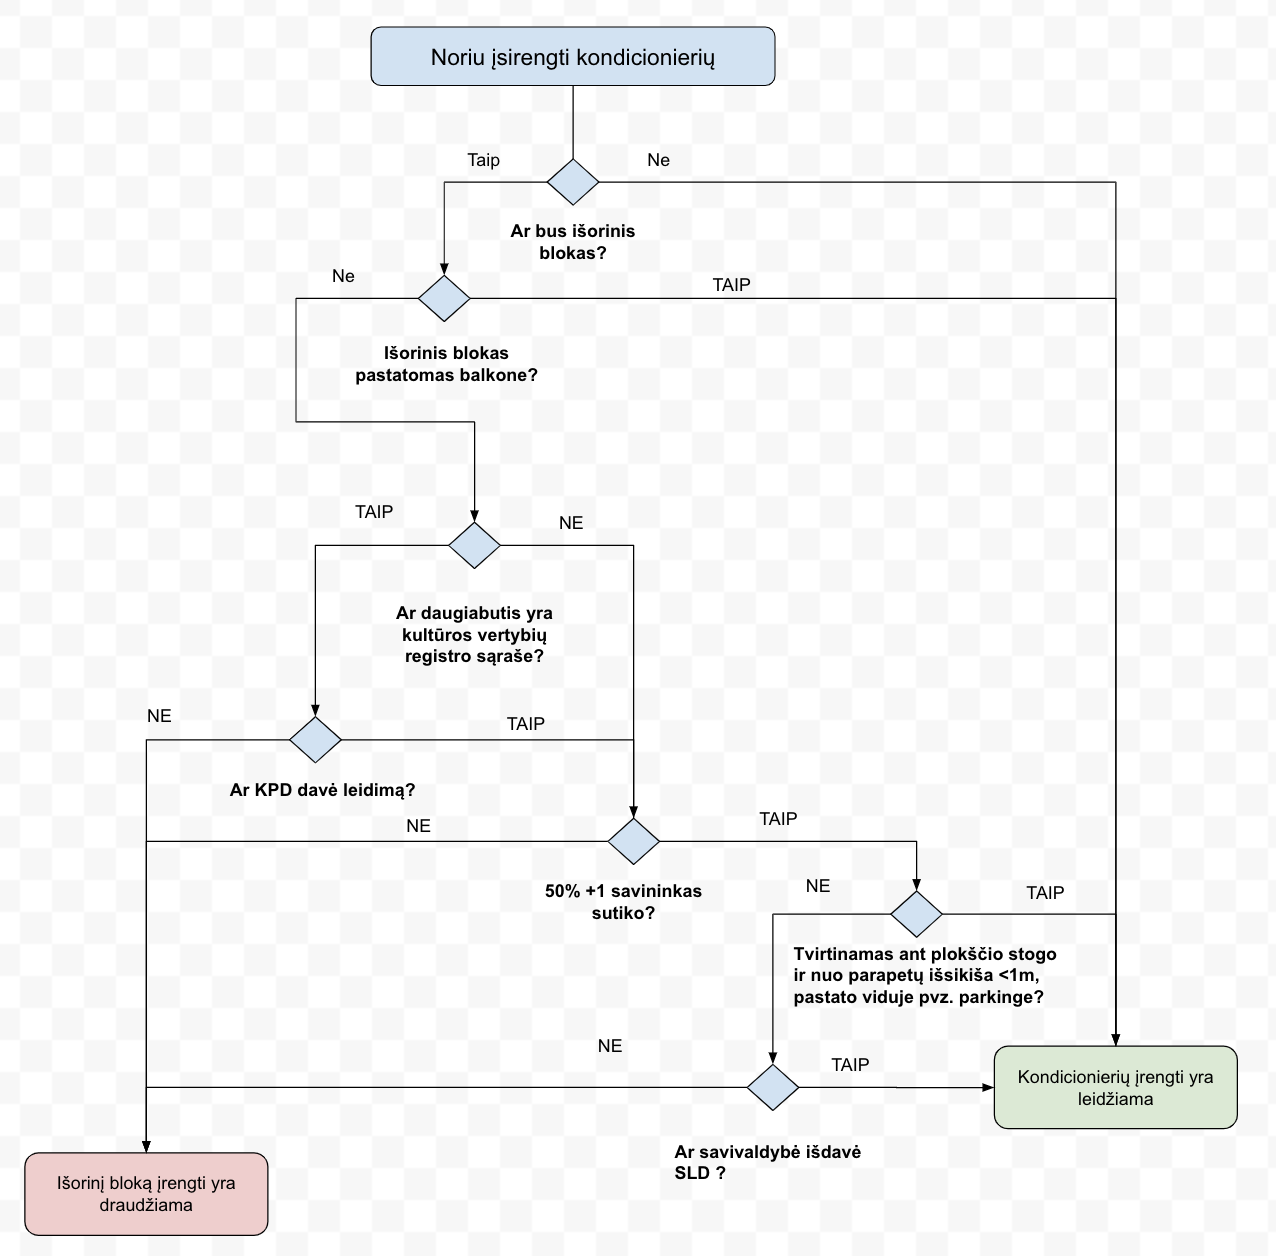 

Klientų klausimų pvz.:
- „Ką daryti norint gauti leidimą įrengti kondicionierių?“
- „Bute norime įrengti kondicionavimo sistemą. Jo išorinis blokas pagal numatytą planą
montuojamas išorinėje pastato dalyje (ant stogo). Noriu Jūsų pasiteirauti: kokie ir kieno
reikalingi sutikimai ar leidimai įrengti išorinį bloką?“
- „Gyvename daugiabutyje, kuris priskirtas prie nekilnojamojo kultūros paveldo. Norime ant
namo sienos įsirengti kondicionierių (siena į kiemo pusę). Kreipėmės į Kultūros paveldo
Klaipėdos skyrių su prašymu duoti leidimą. Taip pat reikalingas daugiabučio gyventojų
sutikimas. Lauksiu Jūsų atsakymo.“

In [1]:
!pip install openai==1.13.3

  Using cached openai-1.13.3-py3-none-any.whl (227 kB)
  Using cached pydantic-2.6.4-py3-none-any.whl (394 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
  Using cached anyio-4.3.0-py3-none-any.whl (85 kB)
  Using cached httpx-0.27.0-py3-none-any.whl (75 kB)
  Using cached distro-1.9.0-py3-none-any.whl (20 kB)
  Using cached idna-3.6-py3-none-any.whl (61 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl (163 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Using cached pydantic_core-2.16.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)


In [1]:
import os
from openai import OpenAI

In [4]:
open_ai_api_key = None

# get the OpenAI API key from the environment
openai_api_key = os.environ.get("OPENAI_API_KEY", None) or open_ai_api_key

if not openai_api_key:
    raise Exception("Please set the OPENAI_API_KEY environment variable.")

# create the OpenAI client
client = OpenAI(api_key=openai_api_key)

In [10]:
system_prompt = """
Tu esi draugiškas asistentas ir turi atsakyti į kliento klausimą apie galimybes įsirengti kondicionierių daugiabučiame name.
Norint įsirengti kondicionierių reikia atitikti tokius reikalavimus:
1. Ar bus išorinis blokas?
Jeigu Ne, kondicionierių įrengti yra leidžiama. 
Jeigu Taip, reikia atsakyti į 2 klausimą.
2. Ar išorinis blokas pastatomas balkone?
Jeigu Taip, kondicionierių įrengti yra leidžiama. 
Jeigu Ne, reikia atsakyti į 3 klausimą.
3. Ar daugiabutis yra kultūros vertybių sąraše?
Jeigu Taip, reikia atsakyti į 4 klausimą.
Jeigu Ne, reikia atsakyti į 5 klausimą.
4. Ar KPD davė leidimą?
Jeigu Ne, įšorinį bloką įrengti yra draudžiama
Jeigu Taip, reikia atsakyti į 5 klausimą.
5. Ar gautas sutikimas iš daugiau nei 50% + 1 gyventojų?
Jeigu Ne, įšorinį bloką įrengti yra draudžiama
Jeigu Taip, reikia atsakyti į 6 klausimą.
6. Ar išorinis blokas tvirtinamas ant plokščio stogo ir nuo parapetų neišsikiša daugiau nei 1 metrą?
Jeigu Taip, kondicionierių įrengti yra leidžiama
Jeigu Ne, įšorinį bloką įrengti yra draudžiama
7. Ar išorinis blokas statomas pastato viduje, pvz. parkinge?
Jeigu Taip, kondicionierių įrengti yra leidžiama
Jeigu Ne, reikia atsakyti į 8 klausimą.
8. Ar savivaldybė išdavė SLD?
Jeigu Taip, kondicionierių įrengti yra leidžiama
Jeigu Ne, įšorinį bloką įrengti yra draudžiama
"""

In [11]:
def cityservice(content: str):
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": content
            }
        ]
    )

    return response.choices[0].message.content

In [12]:
print(cityservice("Ką daryti norint gauti leidimą įrengti kondicionierių?"))

Norint įsirengti kondicionierių, reikia atitikti šiuos reikalavimus:

1. Jeigu bus išorinis blokas, peržiūrėkite kitus punktus. Jei ne, kondicionierių įrengti yra leidžiama.
2. Jei išorinis blokas pastatomas balkone, kondicionierių įrengimas laikomas leidžiamu. Jei ne, eikite į 3 punktą.
3. Jeigu daugiabutis nėra įrašytas į kultūros vertybių sąrašą, eikite į 5 punktą. Jeigu yra, peržiūrėkite 4 punktą.
4. Jeigu Kultūros paveldo departamentas (KPD) davė leidimą, eikite į 5 punktą. Jeigu ne, išorinio bloko įrengti yra draudžiama.
5. Jeigu esate gavę sutikimą iš daugiau nei 50% + 1 gyventojų, eikite į 6 punktą. Jeigu ne, išorinio bloko įrengti yra draudžiama.
6. Jeigu išorinis blokas tvirtinamas ant plokščio stogo ir nuo parapetų neišsikiša daugiau nei 1 metrą, kondicionierių įrengimui nėra kliūčių. Jeigu ne, išorinio bloko įrengti yra draudžiama. 
7. Jeigu išorinis blokas statomas pastato viduje, pvz. parkinge, kondicionierių įrengimas laikomas leidžiamu. Jei ne, peržiūrėkite 8 punktą.
8.

In [15]:
print(cityservice("Bute norime įrengti kondicionavimo sistemą. Jo išorinis blokas pagal numatytą planą montuojamas išorinėje pastato dalyje (ant stogo). Noriu Jūsų pasiteirauti: kokie ir kieno reikalingi sutikimai ar leidimai įrengti išorinį bloką?"))

Noriu pranešti, kad tam reikia vykdyti kelis etapus ir gauti tam tikrus leidimus, kurie yra įvairūs, priklauso nuo situacijos:

1. Pirmiausia reikia išsiaiškinti, ar daugiabutis yra įtrauktas į kultūros vertybių sąrašą. Jei taip, jums reikės gauti Kultūros paveldo departamento (KPD) leidimą.

2. Antra, nepriklausomai nuo pastato statuso, tam, kad įrengti išorinį bloką, reikia gauti daugiau nei 50% + 1 gyventojų sutikimą.

3. Trečia, išorinė dalis turi būti tvirtinama ant plokščio stogo ir neišsikišti daugiau nei 1 metrą nuo parapeto. 

4. Galiausiai, jei įšorinis blokas statomas išorinėje pastato dalyje (nebalkone ir nevidiniuose patalpose, pavyzdžiui, parkinge), gali prireikti gauti savivaldybės išduotą statinio likvidavimo dokumentaciją (SLD). 

Reikalavimai gali skirtis priklausomai nuo vietos savivaldybės, todėl rekomenduojame visada pasitarkite su vietiniu savivaldybės atstovu dėl specifinių reikalavimų.


In [14]:
print(cityservice("Gyvename daugiabutyje, kuris priskirtas prie nekilnojamojo kultūros paveldo. Norime ant namo sienos įsirengti kondicionierių (siena į kiemo pusę). Kreipėmės į Kultūros paveldo Klaipėdos skyrių su prašymu duoti leidimą. Taip pat reikalingas daugiabučio gyventojų sutikimas. Lauksiu Jūsų atsakymo."))

Labai gerai, kad esate informavę savo situaciją detalizuotai. Pirmiausia išsiaiškinkime svarbiausius klausimus:
1. Ar jums pavyko gauti leidimą iš Kultūros paveldo Klaipėdos skyriaus? Jeigu taip, tai yra pirmasis svarbus žingsnis įgyvendinant jūsų planą.
2. Antras svarbus žingsnis yra gauti leidimą iš daugiau nei 50% (plius vieno) daugiabučio gyventojų. Ar jau turite šį leidimą? Jeigu taip, tai puiku.

Kitas svarbus punktas kyla iš to, kur jūs planeirate įtvirtinti išorinį kondicionieriaus bloką. Paprastai tai yra sudėtinga daugiabučiuose namuose ir gali priklauso nuo daugelio veiksnių. Ar yra numatytas konkretus sąlygas ir jūsų planas dėl išorinio bloko tvirtinimo?
Jei visos sąlygos ir leidimai yra, tuomet su teisingu poreikių derinimu ir tinkamu profesionalų pasirinkimu, jūs turėtumėte būti pajėgūs įdiegti kondicionierių jūsų daugiabučiame name.


# Išvados

GPT-4 modelis puikiai susitvarko su klausimais turėdamas nedidelę taisyklių bazę appie kondicionieriaus įrengimą daugiabučiame name. 

Galima pastebėti, kad modelis atsakinėdamas į klausimus daro lietuvių kalbos gramatines klaidas.

Norint patobulinti GPT-4 atsakymus į vartotojų klausimus, reikėtų sukurti vektorinę duomenų bazę su dokumentacijomis apie rūpimus klausimus. Tuomet panaudoti `RAG` metodą, ir suteikti GPT-4 modeliui daugiau žinių apie rūpimą klausimą. Tokiu būdu būtų galima vartotojui suteikti daugiau informacijos apie reikalavimus norint įsirengti kondicionierių gyvenamajame name, galima nukreipti į aktualias internetines nuorodas. Gal būt modelis geriau susitvarkytu su užduotimi Lietuvių kalba (darytų mažiau gramatinių ir sintaksės klaidų).